In [ ]:
import os
import cv2

In [ ]:
def convert_video_to_images(img_folder, filename='/content/assignment3_video.avi'):
    """
    Converts the video file (assignment3_video.avi) to JPEG images.
    Once the video has been converted to images, then this function doesn't
    need to be run again.

    Arguments
    ---------
    filename : (string) file name (absolute or relative path) of video file.
    img_folder : (string) folder where the video frames will be
    stored as JPEG images.
    """
    # Make the img_folder if it doesn't exist.'
    try:
        if not os.path.exists(img_folder):
            os.makedirs(img_folder)
    except OSError:
        print('Error')

    # Make sure that the abscense/prescence of path
    # separator doesn't throw an error.
    img_folder = f'{img_folder.rstrip(os.path.sep)}{os.path.sep}'
    # Instantiate the video object.
    video = cv2.VideoCapture(filename)

    # Check if the video is opened successfully
    if not video.isOpened():
        print("Error opening video file")

    i = 0
    while video.isOpened():
        ret, frame = video.read()
        if ret:
            im_fname = f'{img_folder}frame{i:0>4}.jpg'
            print('Captured...', im_fname)
            cv2.imwrite(im_fname, frame)
            i += 1
        else:
            break

    video.release()
    cv2.destroyAllWindows()

    if i:
        print(f'Video converted\n{i} images written to {img_folder}')

In [ ]:

convert_video_to_images('img_folder')

Captured... img_folder/frame0000.jpg
Captured... img_folder/frame0001.jpg
Captured... img_folder/frame0002.jpg
Captured... img_folder/frame0003.jpg
Captured... img_folder/frame0004.jpg
Captured... img_folder/frame0005.jpg
Captured... img_folder/frame0006.jpg
Captured... img_folder/frame0007.jpg
Captured... img_folder/frame0008.jpg
Captured... img_folder/frame0009.jpg
Captured... img_folder/frame0010.jpg
Captured... img_folder/frame0011.jpg
Captured... img_folder/frame0012.jpg
Captured... img_folder/frame0013.jpg
Captured... img_folder/frame0014.jpg
Captured... img_folder/frame0015.jpg
Captured... img_folder/frame0016.jpg
Captured... img_folder/frame0017.jpg
Captured... img_folder/frame0018.jpg
Captured... img_folder/frame0019.jpg
Captured... img_folder/frame0020.jpg
Captured... img_folder/frame0021.jpg
Captured... img_folder/frame0022.jpg
Captured... img_folder/frame0023.jpg
Captured... img_folder/frame0024.jpg
Captured... img_folder/frame0025.jpg
Captured... img_folder/frame0026.jpg
C

In [ ]:
from PIL import Image
from glob import glob
import numpy as np

In [ ]:
def load_images(img_dir, im_width=60, im_height=44):
    """
    Reads, resizes and normalizes the extracted image frames from a folder.
    The images are returned both as a Numpy array of flattened images (i.e. the images with Arguments
    ---------
    img_dir : (string) the directory where the images are stored.
    im_width : (int) The desired width of the image.
    The default value works well.
    im_height : (int) The desired height of the image.
    The default value works well.
    Returns
    X : (numpy.array) An array of the flattened images.
    images : (list) A list of the resized images.
    """
    images = []
    fnames = glob(f'{img_dir}{os.path.sep}frame*.jpg')
    fnames.sort()

    for fname in fnames:
        im = Image.open(fname)
        # resize the image to im_width and im_height.
        im_array = np.array(im.resize((im_width, im_height)))
        # Convert uint8 to decimal and normalize to 0 - 1.
        images.append(im_array.astype(np.float32) / 255.)
        # Close the PIL image once converted and stored.
        im.close()

    # Flatten the images to a single vector
    X = np.array(images).reshape(-1, np.prod(images[0].shape))

    return X, images

In [ ]:
import tensorflow as tf
import keras
from keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
input_img = keras.Input(shape=(44, 60, 3))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Loading images from the 'img_folder'
X, images = load_images('img_folder')

# Splitting the data into training and testing sets
X_train, X_test, _, _ = train_test_split(X, images, train_size=0.65, random_state=42, shuffle=False)

# Reshaping the training and testing data
X_train = np.reshape(X_train, (len(X_train), 44, 60, 3))
X_test = np.reshape(X_test, (len(X_test), 44, 60, 3))




In [ ]:
autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=10,
                shuffle=True,
                validation_data=(X_test, X_test))


Epoch 1/100
69/69 [==============================] - 5s 55ms/step - loss: 0.0296 - val_loss: 0.0077
Epoch 2/100
69/69 [==============================] - 5s 78ms/step - loss: 0.0021 - val_loss: 0.0064
Epoch 3/100
69/69 [==============================] - 4s 51ms/step - loss: 0.0015 - val_loss: 0.0058
Epoch 4/100
69/69 [==============================] - 4s 53ms/step - loss: 0.0013 - val_loss: 0.0056
Epoch 5/100
69/69 [==============================] - 4s 61ms/step - loss: 0.0012 - val_loss: 0.0056
Epoch 6/100
69/69 [==============================] - 5s 71ms/step - loss: 0.0011 - val_loss: 0.0055
Epoch 7/100
69/69 [==============================] - 4s 55ms/step - loss: 0.0011 - val_loss: 0.0055
Epoch 8/100
69/69 [==============================] - 3s 50ms/step - loss: 0.0010 - val_loss: 0.0054
Epoch 9/100
69/69 [==============================] - 5s 73ms/step - loss: 0.0010 - val_loss: 0.0054
Epoch 10/100
69/69 [==============================] - 4s 57ms/step - loss: 9.9970e-04 - val_loss: 0.

In [ ]:
# Storing losses for individual frames
frame_losses = []

# Calculating losses for each frame in the dataset
for image_frame in images:
    # Reshaping each frame to match the required input shape
    reshaped_frame = image_frame.reshape (1, 44, 60, 3)

    # Calculating loss for the frame using the autoencoder model
    frame_loss = autoencoder.evaluate(reshaped_frame, reshaped_frame, verbose=0)

    # Recording the calculated loss for the frame
    frame_losses.append(frame_loss)


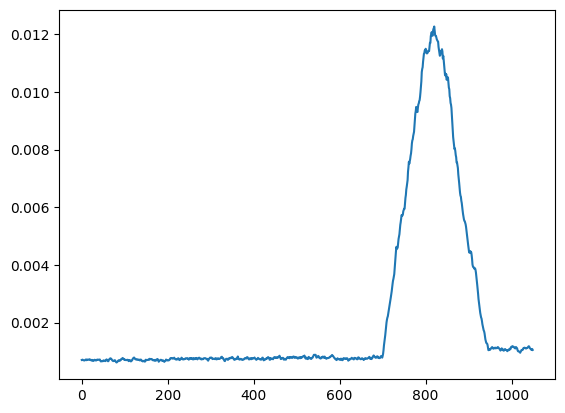

In [ ]:
# Extracting losses
selected_losses = frame_losses[:]

# Plotting the selected losses
plt.plot(selected_losses)
plt.show()

In [ ]:
def predict(frame):
    """
    Argument
    --------
    frame : Video frame with shape == (44, 60, 3) and dtype == float.

    Return
    anomaly : A boolean indicating whether the frame is an anomaly or not.
    ------
    """
    frame = frame.reshape((1, 44, 60, 3))
    loss = autoencoder.evaluate(frame, frame, verbose=0)
    anomaly = loss > 0.0015
    return anomaly

In [ ]:
predict(images[780])

True

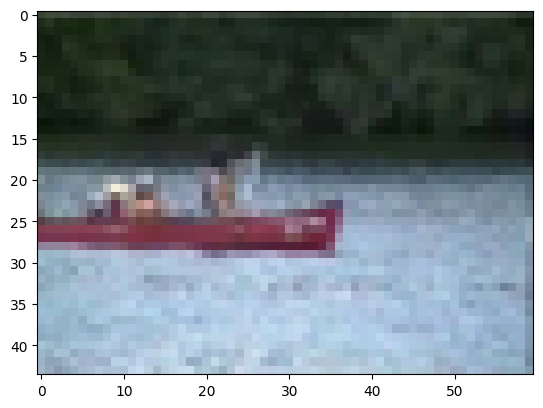

In [ ]:
plt.imshow(images[780])
plt.show()

In [ ]:
predict(images[1000])

False

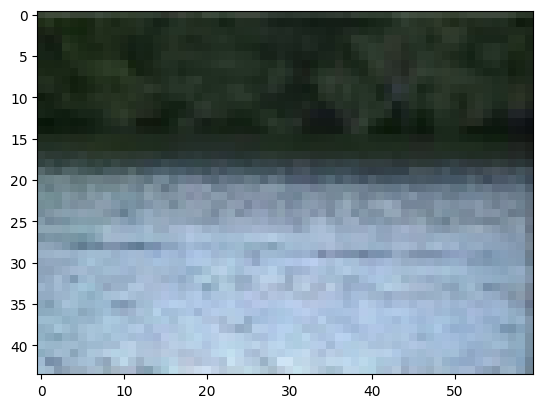

In [ ]:
plt.imshow(images[1000])
plt.show()